# Introduction to Numerical Python

The `numpy` (**num**erical **Py**thon) package is an extensive set of tools for working with **arrays** in Python. `numpy` is at the heart of efficient data science and scientific computation in Python. 

`numpy` has experienced some controversy in recent months due to the publication of a paper on the package in the prominent journal *Nature*. This paper had 26 authors, most of whom work on `numpy` as unpaid and largely unrecognized volunteers. Despite the admirable contributions of the individuals, there has been considerable discussion about the fact that all 26 of the authors were male. This was construed by many to imply that no non-male programmers made sufficient contributions to the package to be listed in the article, either belittling truly important contributions or implying severe recruitment issues. Here is a [short writeup on this controversy](https://slashdot.org/submission/12431354/numpy-reeling-after-all-male-authored-paper-triggers-twitter-diversity-backlash?sbsrc=firehose&utm_medium=feed&utm_source=rss1.0). 

## Arrays 

Recall that, in standard Python, we can create a list containing arbitrary objects, each of which may be stored in disparate parts of the computer's memory. For example: 

In [1]:
L = [1, "picard", 20.20, (9,2)]
for item in L:
    print(id(item))
# ---

4313803104
140331316364400
140331313646608
140331272887808


Because these items occupy different memory locations, operations that take place directly on lists typically require allocating memory many times. 

On the other hand, arrays as defined via `numpy` occupy a single, contiguous chunk of memory. This allows `numpy` arrays to occupy significantly less memory, and makes operations involving `numpy` arrays correspondingly faster. This performance improvement is usually only realized for arrays that contain a single data type. For more details on this, see the accompanying [reading](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html) for this lecture.  

Arrays are ideally suited for operating on large chunks of numbers or text. Let's look at a simple example to see how `numpy` arrays can dramatically improve the performance of our code. The `%timeit` decorator is a "magic" command that will run the supplied line of code many times and print out some measurse of how quickly the code executed. 

In [2]:
def add_lists(L1, L2):
    return [L1[i] + L2[i] for i in range(len(L1))]

In [4]:
L1 = list(range(100))
L2 = list(range(100))

%timeit add_lists(L1, L2)

24.2 µs ± 3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Now let's try this with `numpy` arrays. An especially useful way to create an array is to call `np.array()` on a list. 

In [6]:
import numpy as np

a1 = np.array(L1)
a2 = np.array(L2)
%timeit a1 + a2

2.41 µs ± 724 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The same operation (entrywise addition) is almost 20 times faster when using `numpy` arrays! 

Arrays can also contain strings. This is not very common, and in most cases the arrays we write in this class will contain integers or floats. 

In [7]:
s = "to boldly go"
np.array(s.split())

array(['to', 'boldly', 'go'], dtype='<U6')

## Vectorization

You might have noticed that, in the code above, we were able to do `a1 + a2` and get the expected result. As you may have seen already, this doesn't exactly work for lists: `L1 + L2` concatenates the lists, rather than computing the entrywise sum. 

A *vectorized* function is one that operates on all elements of an array in entrywise fashion. So, we saw above that the `+` function, when applied to arrays, is vectorized. The `numpy` module includes a large number of vectorized functions. These should almost always be used when working with arrays: 

In [9]:
# entrywise array multiplication

a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([6, 7, 8, 9, 10])

a1*a2

array([ 6, 14, 24, 36, 50])

In [10]:
# entrywise scalar multiplication
2*a1

array([ 2,  4,  6,  8, 10])

In [11]:
# scalar addition 
2 + a1

array([3, 4, 5, 6, 7])

Vectorized functions operating on `numpy` arrays can be vastly more efficient than approaches that operate on lists one-by-one. We already saw the example of vectorized addition. Here's another one: 

In [12]:
import math

def list_sin(L):
    L_out = []
    for i in range(len(L)):
        L_out.append(math.sin(L[i]))
    return L_out

Let's check that this works: 

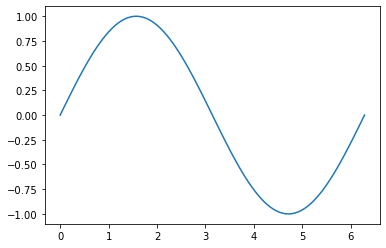

In [14]:
a = np.linspace(0, 2*np.pi, 101)
L = list(a)
to_plot = list_sin(L)

from matplotlib import pyplot as plt
plt.plot(L, to_plot)

In [15]:
# how fast is it? 
%timeit list_sin(L)

39.9 µs ± 6.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Our `for`-loop based approach works, but....

In [16]:
# faster and way easier to write! 
%timeit np.sin(a)

3.67 µs ± 815 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


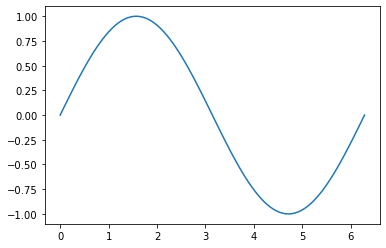

In [17]:
# works as a one-liner
plt.plot(a, np.sin(a))

## "Should I use `numpy` arrays?"

If you will operate on one or more large sets of numbers and are considering writing `for`-loops, stop. Ask yourself whether you can achieve your task with `numpy` arrays instead. 90% of the time, `numpy`-based code is faster to write and faster to execute. 

## "Should I use `for`-loops?"

When working with lists and other basic data structures, yes, absolutely! When working with `numpy` arrays, however, writing `for`-loops is almost always the wrong thing to do. Find a way using vectorized `numpy` code. 